# Exercise 2 - Machine Learning Classifiers Using Scikit-Learn

In [2]:
import numpy as np
import pandas as pd

s = 'https://github.com/agarwalankush/ECON5130/blob/main/lecture2/CreditData.data?raw=true'
df = pd.read_csv(s, header=None,encoding='utf-8', on_bad_lines='skip')
newdf = df.sort_values(by=df.columns[0])
print(newdf)
y = newdf.iloc[:, 0].values
X = newdf.iloc[:, [1, 4]].values
print('Class labels:', np.unique(y))

     0          1       2       3          4
0    0  48.039831   95010   50565  56.588220
103  0  46.543670   34773    2203  12.802089
125  0  44.476253   67349   91485  61.557707
28   0  32.928346   50442   56129  51.066597
91   0  47.801408  181694   88792  25.544521
..  ..        ...     ...     ...        ...
54   2  40.995155  315959   63718   2.930676
124  2  45.271690  299937   50130  13.875996
95   2  34.358797  398282  164229  25.861699
60   2  32.411863  211593   99790   2.567693
77   2  43.768927  313182  180775  26.888192

[150 rows x 5 columns]
Class labels: [0 1 2]


To evaluate the performance of a trained model on unseen data, we split the dataset into separate training and test datasets. We randomly split the data into 70% training (105 examples) and 30% test (45 examples) data.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# random_state : controls shuffling order
# stratify over y : each set contains approximately the same percentage of samples of each target class as the complete set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [4]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [43 76 31]
Labels counts in y_train: [30 53 22]
Labels counts in y_test: [13 23  9]


##### Standardizing the features (preprocessing)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # computes mean and std dev for each dimension
X_train_std = sc.transform(X_train) # Perform standardization by centering and scaling
X_test_std = sc.transform(X_test) 

## Training a perceptron via scikit-learn

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

Unlike in Lecture 1 where we only used binary classification, here we are able to feed three flower classes simultaneously to the linear perceptron model. The multiclass classification is done via **one-versus-rest** (**OvR**) method. **eta0** is the learning rate parameter, and **random_state** parameter ensures the reproducibility. 

Once the model is trained via the **fit** method, we can make predictions via the **predict** method.

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 17


##### Performance metrics

There is a wide range of performance metrics available in scikit-learn via the **metrics** module. For example, the classification score is the most basic one. 

In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.622


##### Use the in-built score function in the classifier

In [9]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.622


##### Function to plot decision regions

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

Note above, that we can now mark the indices of the examples with different markers. Next, we train a perceptron model using the standardized training data:

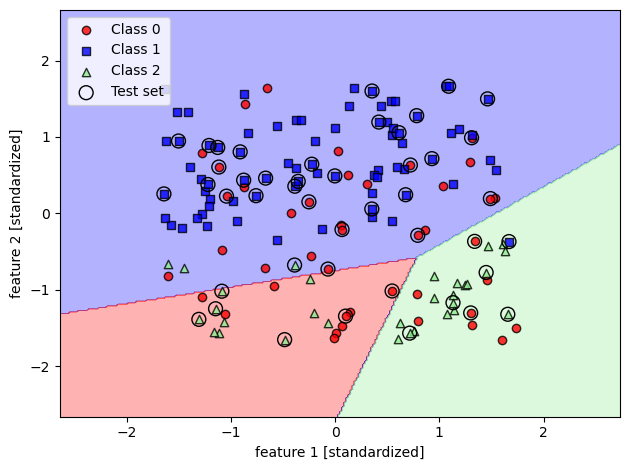

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('feature 1 [standardized]')
plt.ylabel('feature 2 [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Recall that the perceptron algorithm never converges on datasets that are not perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice.

<br>
<br>

# Modeling class probabilities via logistic regression

### Learning the weights of the logistic loss function

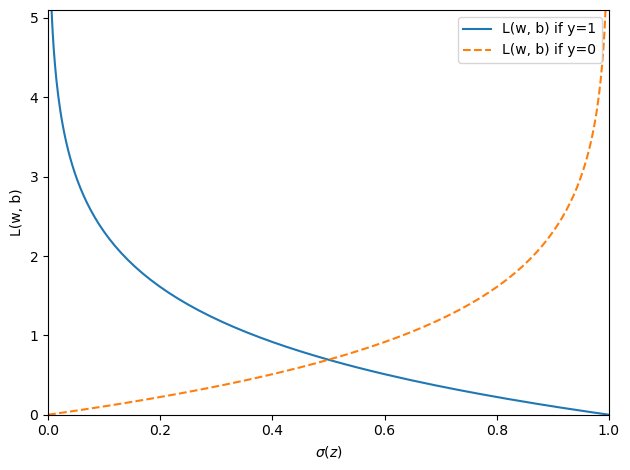

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def loss_1(z):
    return - np.log(sigmoid(z))


def loss_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_04.png', dpi=300)
plt.show()

We can see that the loss approaches 0 (continuous line) if we correctly predict that an example belongs to class 1. Similarly, we can see on the $y$ axis that the loss also approaches 0 if we correctly predict $y$ = 0 (dashed line). However, if the prediction is wrong, the loss goes toward infinity. The main point is that we penalize wrong predictions with an increasingly larger loss.

### Converting an Adaline implementation into an algorithm for logistic regression

In [15]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

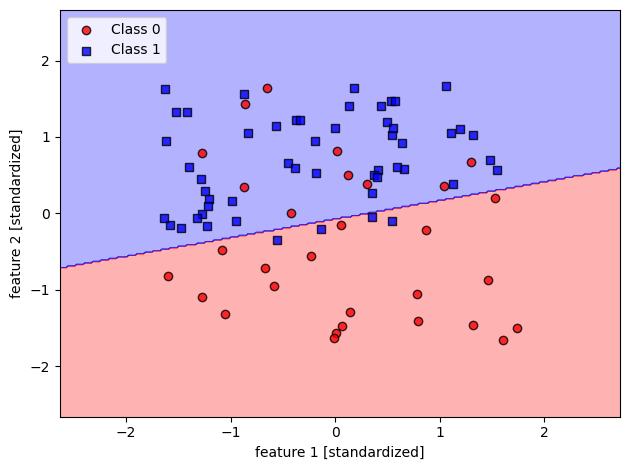

In [35]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('feature 1 [standardized]')
plt.ylabel('feature 2 [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Training a logistic regression model with scikit-learn

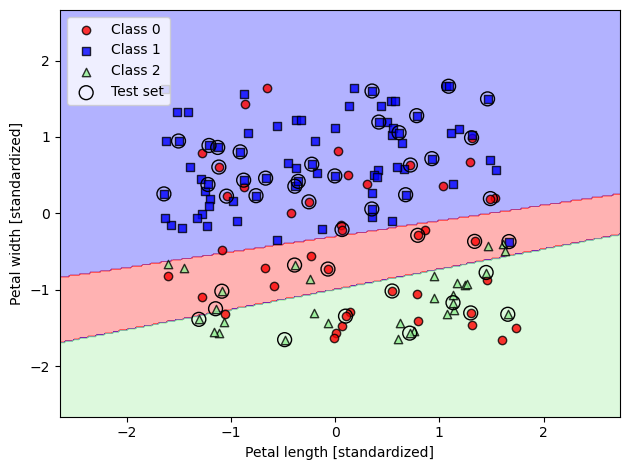

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('feature 1 [standardized]')
plt.ylabel('feature 2 [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The parameter $C$ used above is a regularization parameter which is used to control overfitting. The probability that training examples belong to a certain class can be computed using the **predict_proba** method. For example, we can predict the probabilities of the first three examples in the test dataset as follows:

In [18]:
lr.predict_proba(X_test_std[:3, :])

array([[0.29184509, 0.62344524, 0.08470967],
       [0.39307931, 0.01277185, 0.59414883],
       [0.20416651, 0.77058631, 0.02524718]])

The first row corresponds to the class membership probabilities of the first flower, the second row corresponds to the class membership probabilities of the second flower, and so forth. Notice that the column-wise sum in each row is 1, as expected

In [19]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

The highest value in the first row is approximately 0.85, which means that the first example belongs to class 3 (<tt>Iris-virginica</tt>) with a predicted probability of 85 percent. 

In [20]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([1, 2, 1], dtype=int64)

In practice, the more convenient way of obtaining class labels when using scikit-learn is to call the **predict** method directly:

In [21]:
lr.predict(X_test_std[:3, :])

array([1, 2, 1], dtype=int64)

If we want to predict the class label of a single flower example: scikit-learn expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy's reshape method to add a new dimension.

In [22]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([1], dtype=int64)

### Tackling overfitting via regularization

Overfitting is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data (test data). If a model suffers from overfitting, we also say that the model has a high variance, which can be caused by having too many parameters, leading to a model that is too complex given the underlying data. Similarly, our model can also suffer from underfitting (high bias), which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data. 

Although we have only encountered linear models for classification so far, the problems of overfitting and underfitting can be best illustrated by comparing a linear decision boundary to more complex, nonlinear decision boundaries.

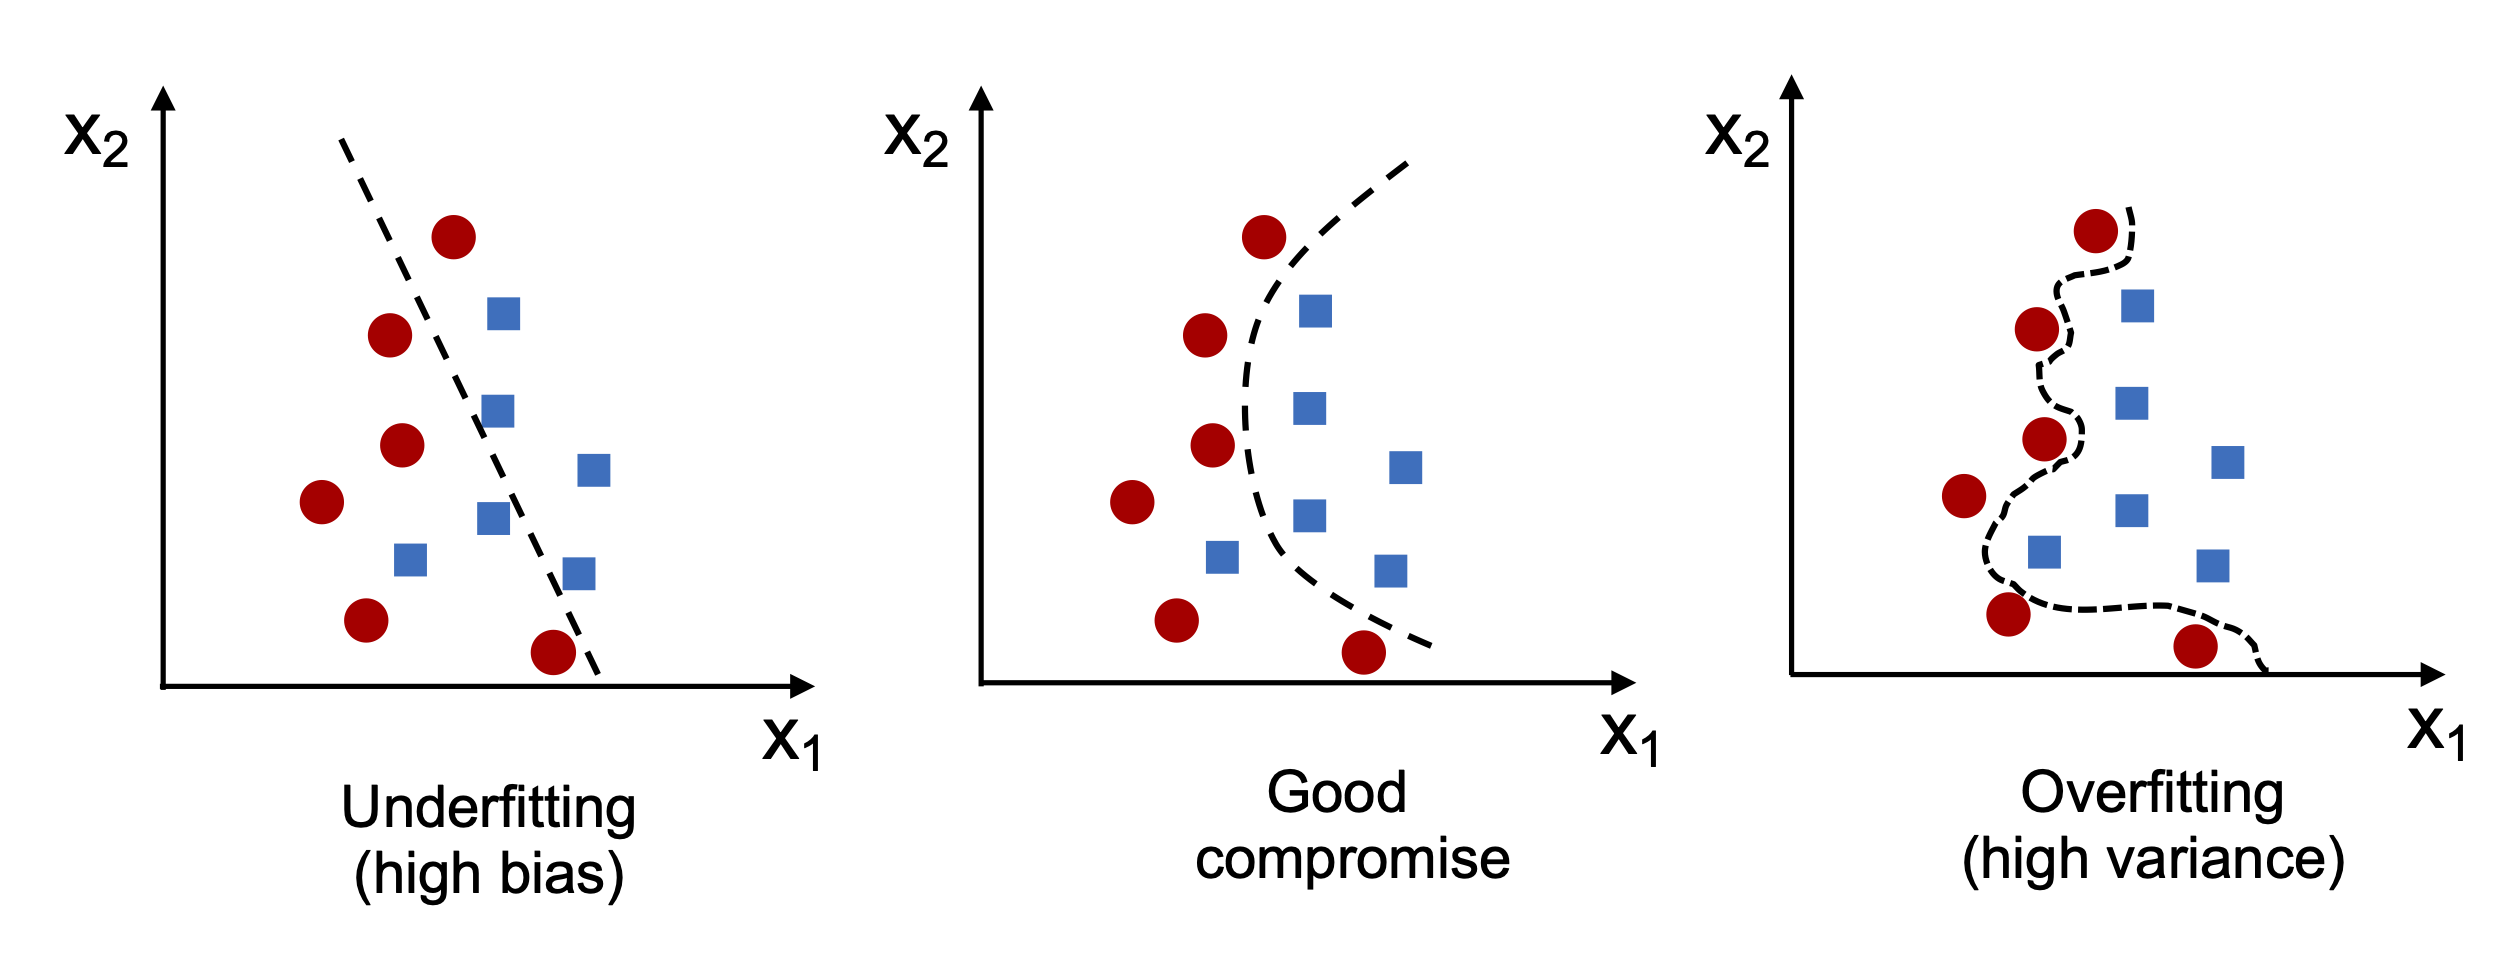

In [24]:
Image(filename='figures/03_07.png', width=700) 

One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization. Regularization is a very useful method for handling collinearity (high correlation among features), filtering out noise from data, and eventually preventing overfitting.

The concept behind regularization is to introduce additional information to penalize extreme parameter (weight) values. The most common form of regularization is so-called **L2 regularization** (sometimes also called L2 shrinkage or weight decay), which can be written as follows:
\begin{equation}
\frac{\lambda}{2n}\| w\|^2 = \frac{\lambda}{2n}\sum^m_{j=2}w_j^2.
\end{equation}
Here $\lambda$ is called the so-called **regularization** parameter. The sample size n is added to
scale the regularization term similar to the loss.

Adding the regularization term to the loss changes the partial derivative to the following form:
\begin{equation}
\frac{\partial L(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{n}\sum^n_{i=1} \Bigl(\sigma\bigl(\mathbf{w}^\top\mathbf{x}^{(i)}\bigr) - y^{(i)} \Bigr)x_j^{(i)} \right) + \frac{\lambda}{n}w_j.
\end{equation}

Via the regularization parameter, $\lambda$ , we can then control how closely we fit the training data, while keeping the weights small. By increasing the value of $\lambda$, we increase the regularization strength. Please note that the bias unit, which is essentially an intercept term or negative threshold is usually not regularized.

The parameter, $C$, that is implemented for the LogisticRegression class in scikit-learn comes from
a convention in support vector machines, which will be the next topic. The term $C$ is
inversely proportional to the regularization parameter, $\lambda$. Consequently, decreasing the value of the inverse regularization parameter, $C$, means that we are increasing the regularization strength, which we can visualize by plotting the L2 regularization path for the two weight coefficients.

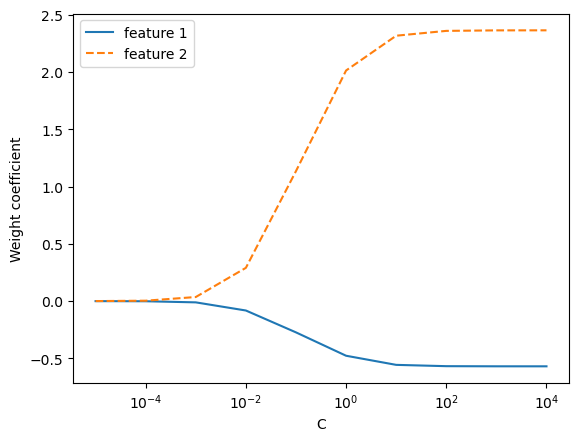

In [24]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='feature 1')
plt.plot(params, weights[:, 1], linestyle='--',
         label='feature 2')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('figures/03_08.png', dpi=300)
plt.show()

We fitted 10 logistic regression models with different values for the inverse-regularization parameter, $C$. For illustration purposes, we only collected the weight coefficients
of class 1 (here, the second class in the dataset: <tt>Iris-versicolor</tt>) versus all classifiers—remember that we are using the OvR technique for multiclass classification. As we can see in the resulting plot, the weight coefficients shrink if we decrease parameter C, that is, if we increase the regularization strength.

Increasing the regularization strength can reduce overfitting, but we cannot strongly regularize all models by default. If the regularization strength is too high and the weights coefficients approach zero, the model can perform very poorly due to underfitting.

<br>
<br>

# Maximum margin classification with support vector machines

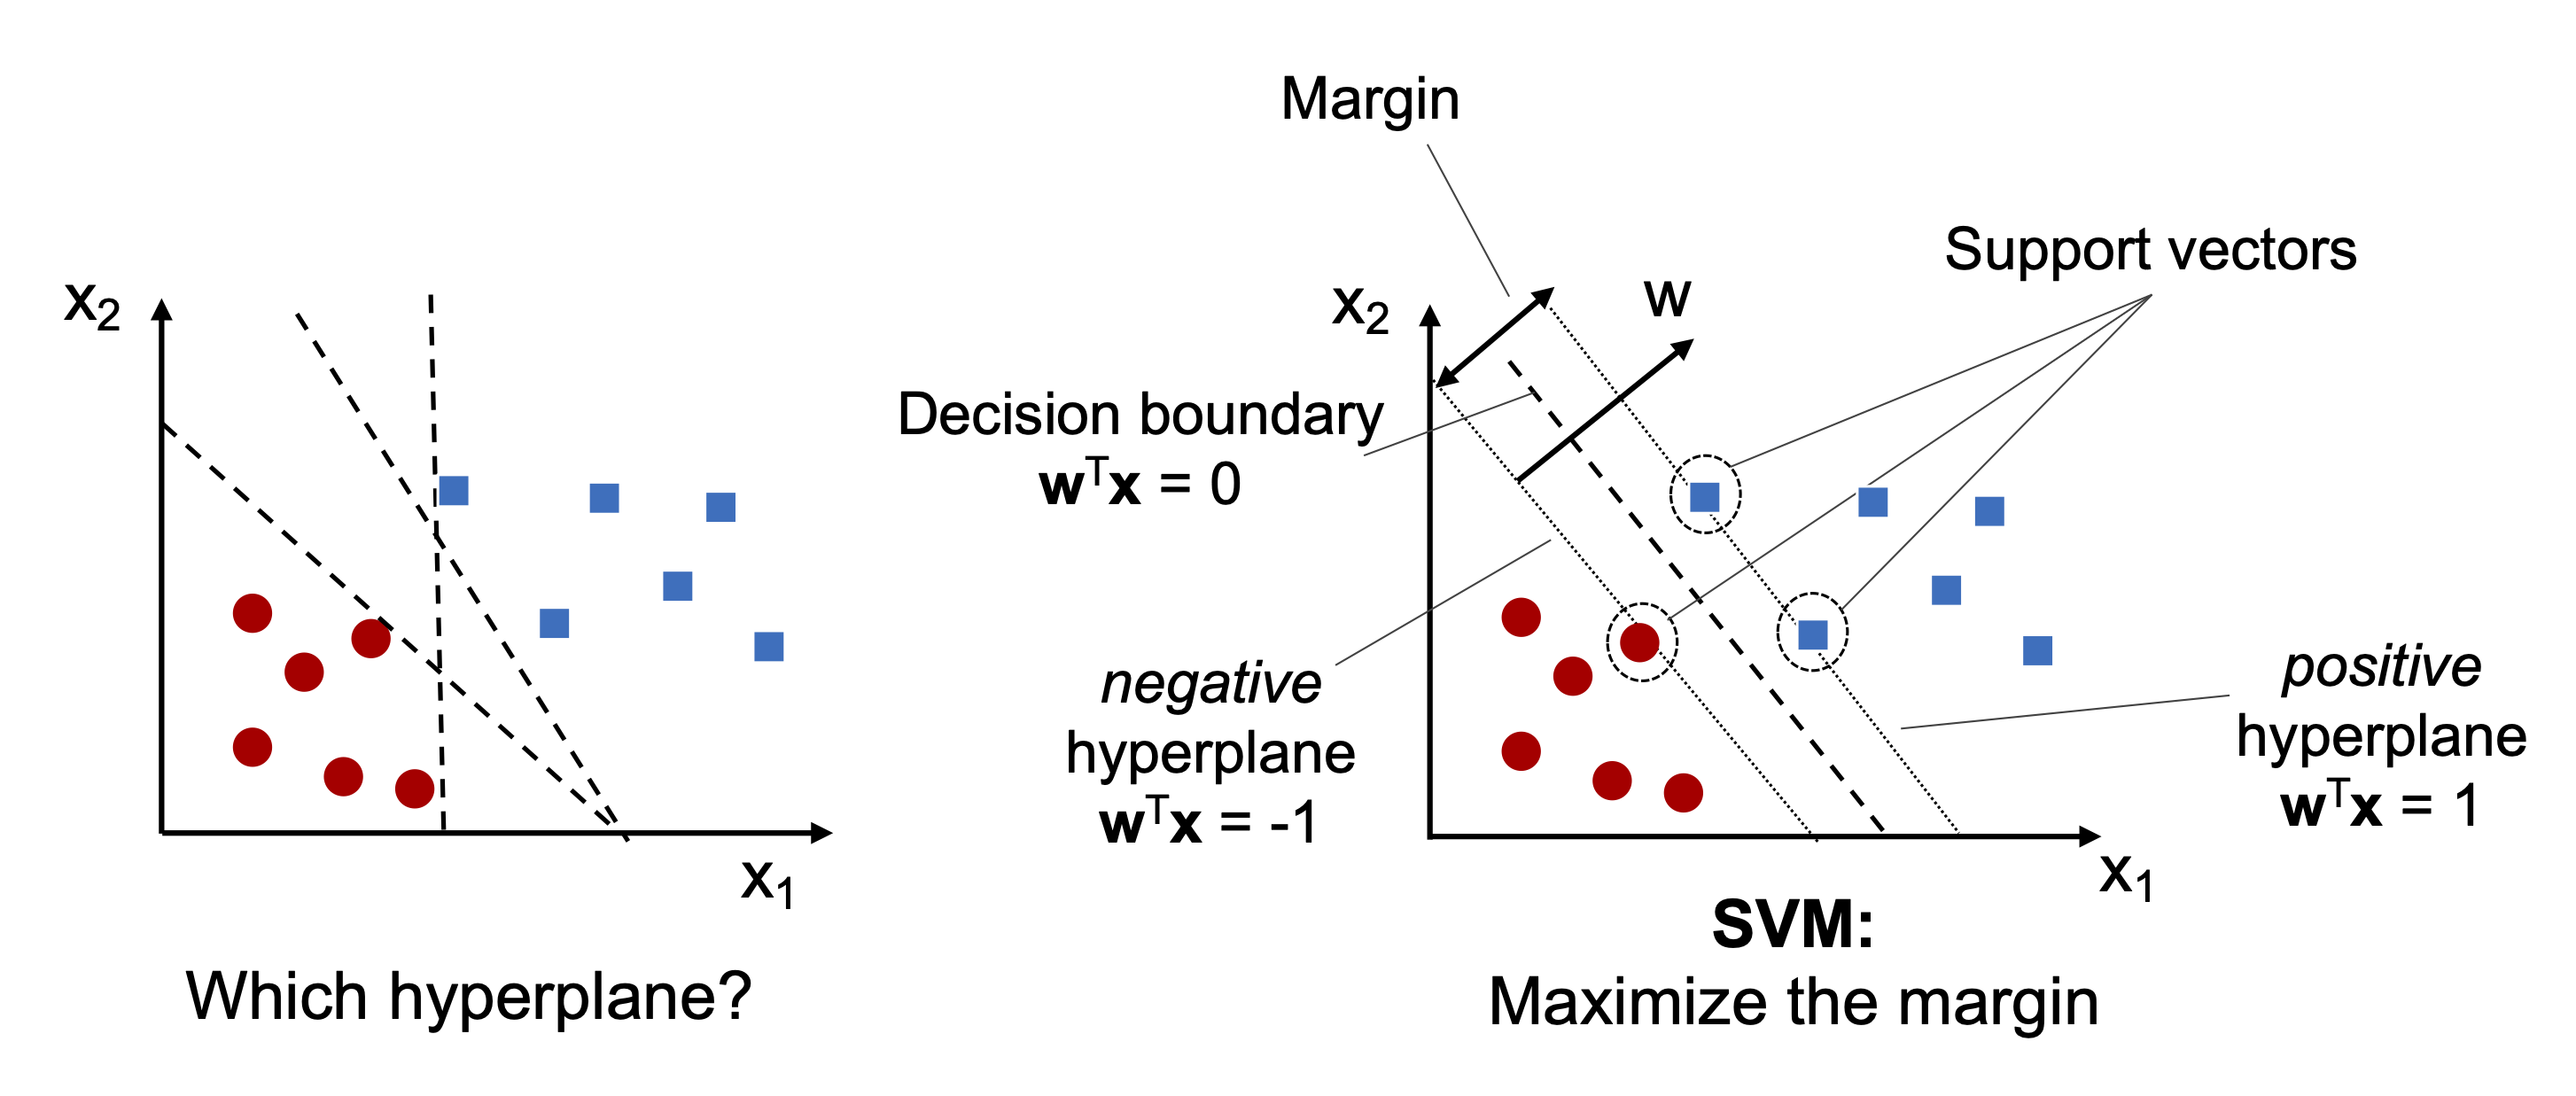

In [26]:
Image(filename='figures/03_09.png', width=700) 

Another powerful and widely used learning algorithm is the **support vector machine** (SVM), which
can be considered an extension of the perceptron. Using the perceptron algorithm, we minimized
misclassification errors. However, in SVMs, our optimization objective is to maximize the margin.
The margin is defined as the distance between the separating hyperplane (decision boundary) and
the training examples that are closest to this hyperplane, which are the so-called **support vectors**.

## Maximum margin intuition

The rationale behind having decision boundaries with large margins is that they tend to have a lower
generalization error, whereas models with small margins are more prone to overfitting.

Unfortunately, while the main intuition behind SVMs is relatively simple, the mathematics behind
them is quite advanced and would require sound knowledge of constrained optimization. Hence, the details behind maximum margin optimization in SVMs are not covered.

## Dealing with the nonlinearly separable case using slack variables

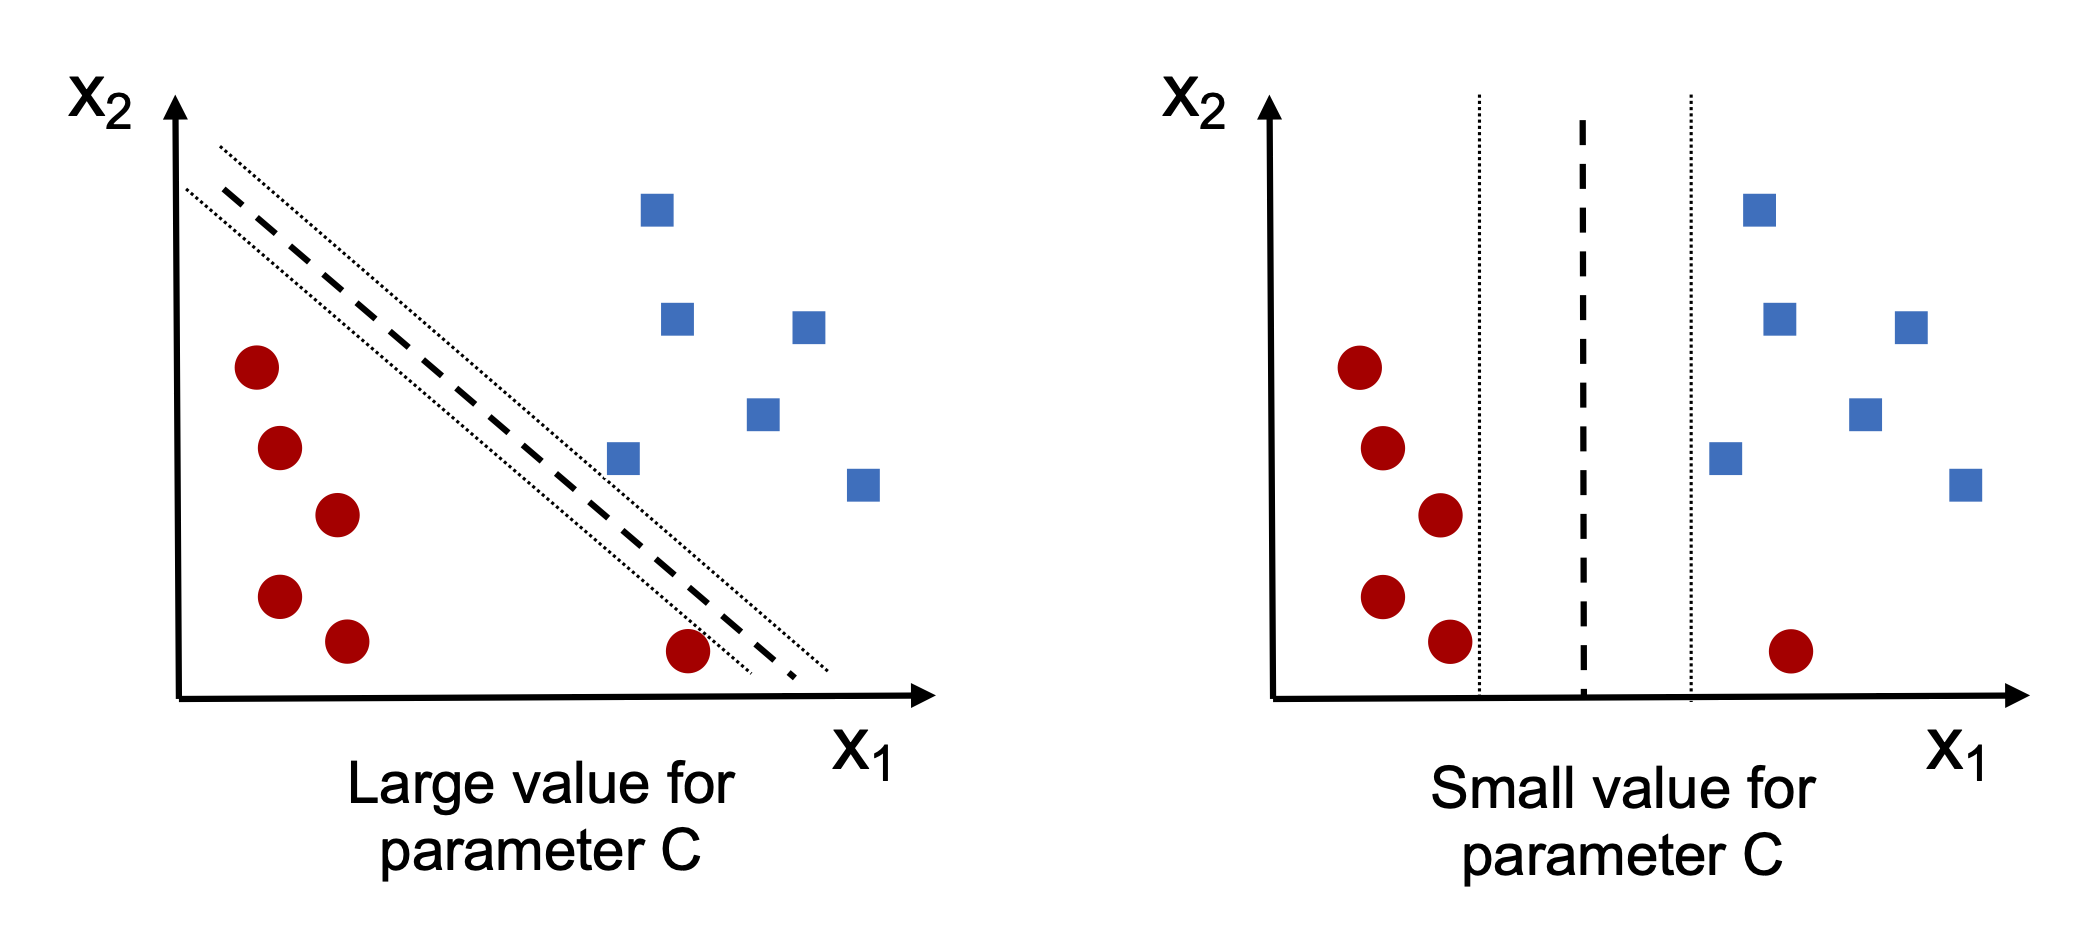

In [27]:
Image(filename='figures/03_10.png', width=600) 

The motivation for introducing the slack variable was that the linear constraints in the SVM optimization objective need to be relaxed for nonlinearly separable data to allow the convergence of the optimization in the presence of misclassifications, under appropriate loss penalization.

The use of the slack variable, in turn, introduces the variable, which is commonly referred to as $C$ in SVM contexts. We can consider $C$ as a hyperparameter for controlling the penalty for misclassification. Large values of $C$ correspond to large error penalties, whereas we are less strict about misclassification errors if we choose smaller values for $C$. We can then use the $C$ parameter to control the width of the margin and therefore tune the bias-variance tradeoff.

This concept is related to regularization, which we discussed in the previous section in the context of regularized regression, where decreasing the value of $C$ increases the bias (underfitting) and lowers the variance (overfitting) of the model.

Let us train an SVM model to classify the different flowers in our Iris dataset:

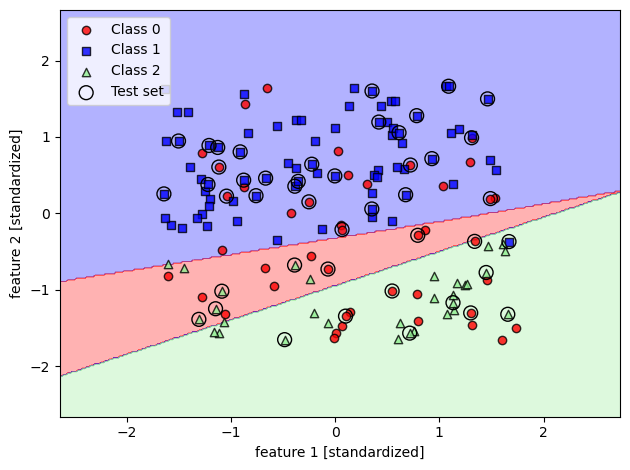

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('feature 1 [standardized]')
plt.ylabel('feature 2 [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

## Alternative implementations in scikit-learn

In [26]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

# Solving non-linear problems using a kernel SVM

Another reason why SVMs enjoy high popularity among machine learning practitioners is that they
can be easily kernelized to solve nonlinear classification problems. Let us first create a synthetic
dataset to see what such a nonlinear classification problem may look like. Using the following code, we will create a simple dataset that has the form of an XOR gate using the <tt>logical_or</tt> function from NumPy, where 100 examples will be assigned the class label 1, and 100 examples will be assigned the class label -1:

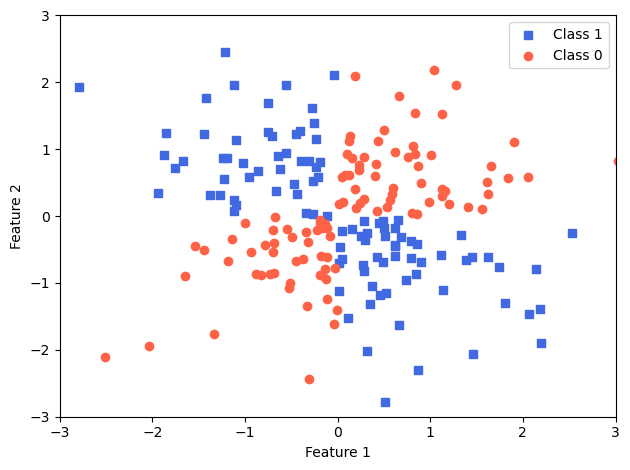

In [27]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_12.png', dpi=300)
plt.show()

The basic idea behind kernel methods for dealing with such linearly inseparable data is to create
nonlinear combinations of the original features to project them onto a higher-dimensional space via
a mapping function, $\phi$ , where the data becomes linearly separable.

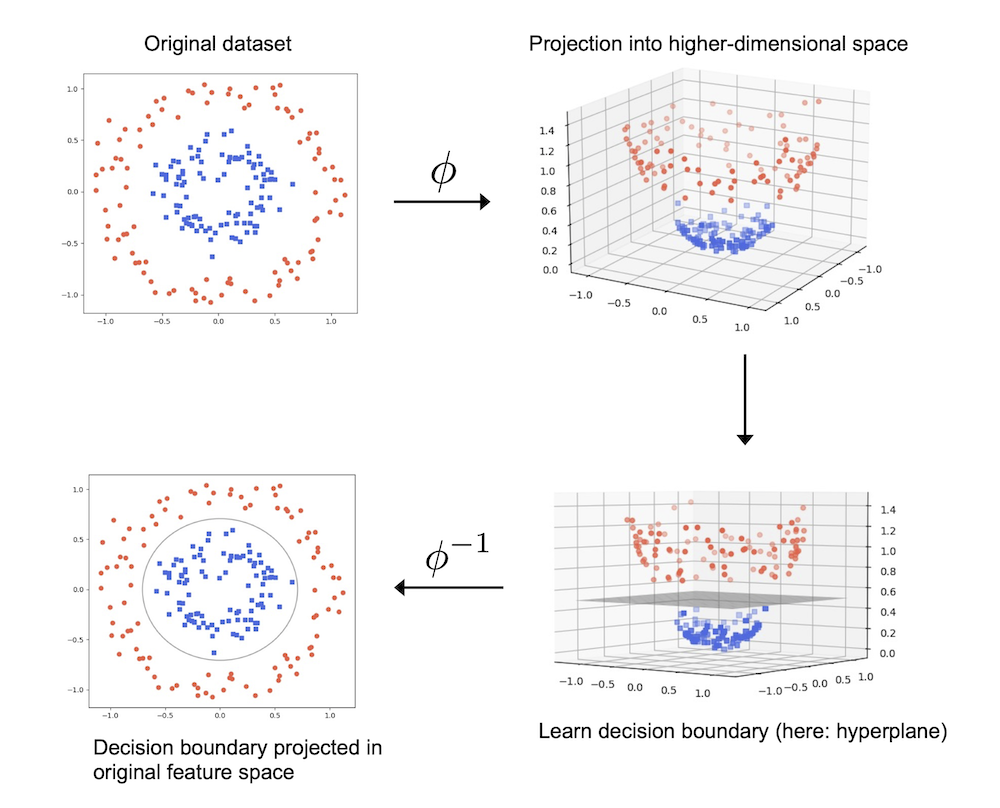

In [31]:
Image(filename='figures/03_13.png', width=700) 

## Using the kernel trick to find separating hyperplanes in higher dimensional space

To solve a nonlinear problem using an SVM, we would transform the training data into a higher-dimensional feature space via a mapping function, $\phi$ , and train a linear SVM model to classify the data in this new feature space. Then, we could use the same mapping function, $\phi$, to transform new, unseen data to classify it using the linear SVM model.

However, one problem with this mapping approach is that the construction of the new features is
computationally very expensive, especially if we are dealing with high-dimensional data. This is where the so-called **kernel trick** comes into play.

To solve the quadratic programming task to train an SVM, in practice, we just need to replace the dot product ${\mathbf{x}^{(i)}}^\top \mathbf{x}^{(j)}$ by $\phi\bigl(\mathbf{x}^{(i)}\bigr)^\top \phi\bigl(\mathbf{x}^{(j)}\bigr).$ To save the expensive step of calculating this dot product between two points explicitly, we define a so-called **kernel function**:
\begin{equation}
\kappa\bigl(\mathbf{x}^{(i)},\mathbf{x}^{(j)}\bigr) = \phi\bigl(\mathbf{x}^{(i)}\bigr)^\top \phi\bigl(\mathbf{x}^{(j)}\bigr).
\end{equation}

One of the most widely used kernels is the radial basis function (RBF) kernel, which can simply be
called the Gaussian kernel:
\begin{equation}
\kappa\bigl(\mathbf{x}^{(i)},\mathbf{x}^{(j)}\bigr) = \exp \left(-\frac{\| \mathbf{x}^{(i)} - \mathbf{x}^{(j)}\|^2}{2\sigma^2} \right).
\end{equation}
This is often simplified to 
\begin{equation}
\kappa\bigl(\mathbf{x}^{(i)},\mathbf{x}^{(j)}\bigr) = \exp \left(-\gamma \| \mathbf{x}^{(i)} - \mathbf{x}^{(j)}\|^2 \right).
\end{equation}

Here $\gamma = \frac{1}{2\sigma^2}$ is a free parameter to be optimized. Roughly speaking, the term "kernel" can be interpreted as a similarity function between a pair of examples.
The minus sign inverts the distance measure into a similarity score, and, due to the exponential
term, the resulting similarity score will fall into a range between 1 (for exactly similar examples) and 0 (for very dissimilar examples).

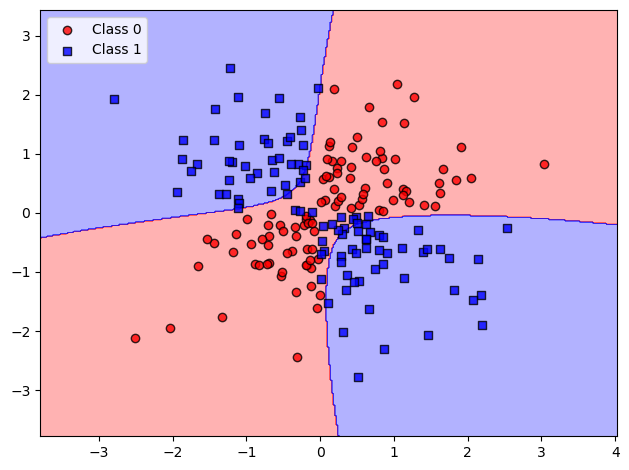

In [28]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_14.png', dpi=300)
plt.show()

The $\gamma$ parameter, which we set to <tt>gamma=0.1</tt>, can be understood as a cut-off parameter for the Gaussian sphere. If we increase the value for $\gamma$, we increase the influence or reach of the training examples, which leads to a tighter and bumpier decision boundary. To get a better understanding of $\gamma$, let us apply an RBF kernel SVM to the Iris flower dataset.

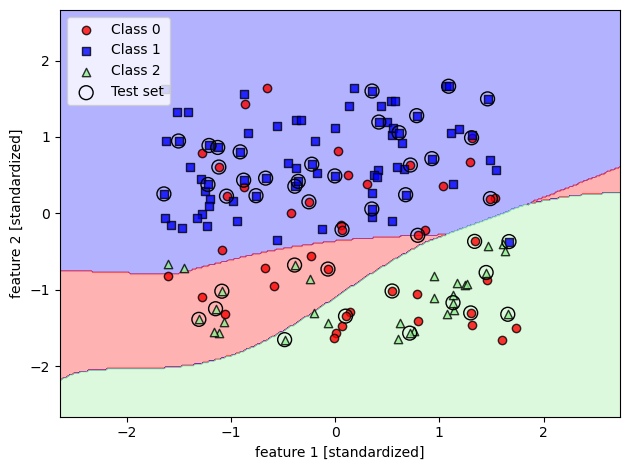

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('feature 1 [standardized]')
plt.ylabel('feature 2 [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Since we chose a relatively small value for $\gamma$ , the resulting decision boundary of the RBF kernel SVM model will be relatively soft.

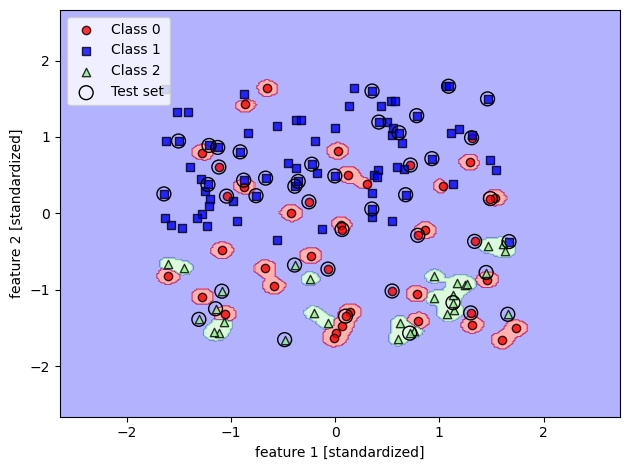

In [32]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('feature 1 [standardized]')
plt.ylabel('feature 2 [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_16.png', dpi=300)
plt.show()

We can now see that the decision boundary around the classes 0 and 1 is much tighter using a relatively large value of $\gamma$. Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. This illustrates that the $\gamma$ parameter also plays an important role in controlling overfitting or variance when the algorithm is too sensitive to fluctuations in the training dataset.